In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [39]:
# Charger les datasets depuis les fichiers CSV
medals = pd.read_csv('../csv/olympic_medals.csv')
results = pd.read_csv('../csv/olympic_results.csv')
athletes = pd.read_csv('../csv/olympic_athletes.csv')
hosts = pd.read_csv('../csv/olympic_hosts.csv')

# Afficher les premières lignes de chaque dataframe
print(medals.head())
print(results.head())
print(athletes.head())
print(hosts.head())

   Unnamed: 0 discipline_title     slug_game    event_title event_gender  \
0           0          Curling  beijing-2022  Mixed Doubles        Mixed   
1           1          Curling  beijing-2022  Mixed Doubles        Mixed   
2           2          Curling  beijing-2022  Mixed Doubles        Mixed   
3           3          Curling  beijing-2022  Mixed Doubles        Mixed   
4           4          Curling  beijing-2022  Mixed Doubles        Mixed   

  medal_type participant_type participant_title  \
0       GOLD         GameTeam             Italy   
1       GOLD         GameTeam             Italy   
2     SILVER         GameTeam            Norway   
3     SILVER         GameTeam            Norway   
4     BRONZE         GameTeam            Sweden   

                                         athlete_url     athlete_full_name  \
0  https://olympics.com/en/athletes/stefania-cons...  Stefania CONSTANTINI   
1      https://olympics.com/en/athletes/amos-mosaner          Amos MOSANER   
2 

In [40]:
# Exploration des données pour comprendre leur structure
print(medals.info())
print(results.info())
print(athletes.info())
print(hosts.info())

# Statistiques descriptives
print(medals.describe())
print(results.describe())
print(athletes.describe())
print(hosts.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             21697 non-null  int64 
 1   discipline_title       21697 non-null  object
 2   slug_game              21697 non-null  object
 3   event_title            21697 non-null  object
 4   event_gender           21697 non-null  object
 5   medal_type             21697 non-null  object
 6   participant_type       21697 non-null  object
 7   participant_title      6584 non-null   object
 8   athlete_url            17027 non-null  object
 9   athlete_full_name      18073 non-null  object
 10  country_name           21697 non-null  object
 11  country_code           20195 non-null  object
 12  country_3_letter_code  21697 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to

In [41]:
# Afficher les informations sur les valeurs nulles avant le nettoyage
print("Valeurs nulles avant le nettoyage :")
print(medals.isnull().sum())
print(results.isnull().sum())
print(athletes.isnull().sum())
print(hosts.isnull().sum())


Valeurs nulles avant le nettoyage :
Unnamed: 0                   0
discipline_title             0
slug_game                    0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        15113
athlete_url               4670
athlete_full_name         3624
country_name                 0
country_code              1502
country_3_letter_code        0
dtype: int64
Unnamed: 0                    0
discipline_title              0
event_title                   0
slug_game                     0
participant_type              0
medal_type               142598
athletes                 154828
rank_equal               130278
rank_position              3878
country_name                  0
country_code               5036
country_3_letter_code         0
athlete_url               32813
athlete_full_name         21158
value_unit                84158
value_type                72755
dtype: int64
athlete_url            

In [42]:
# Fonction de nettoyage des données
def clean_data(df, columns_to_drop):
    df = df.drop(columns=columns_to_drop)
    df = df.dropna()
    df = df.drop_duplicates()
    return df

# Colonnes à supprimer 
medals_columns_to_drop = ['Unnamed: 0']
results_columns_to_drop = ['Unnamed: 0']
athletes_columns_to_drop = []
hosts_columns_to_drop = ['index']

# Nettoyer chaque dataset
medals_cleaned = clean_data(medals, medals_columns_to_drop)
results_cleaned = clean_data(results, results_columns_to_drop)
athletes_cleaned = clean_data(athletes, athletes_columns_to_drop)
hosts_cleaned = clean_data(hosts, hosts_columns_to_drop)

# Vérifier le nettoyage
print(medals_cleaned.head())
print(results_cleaned.head())
print(athletes_cleaned.head())
print(hosts_cleaned.head())


  discipline_title     slug_game    event_title event_gender medal_type  \
0          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
1          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
2          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
3          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
4          Curling  beijing-2022  Mixed Doubles        Mixed     BRONZE   

  participant_type participant_title  \
0         GameTeam             Italy   
1         GameTeam             Italy   
2         GameTeam            Norway   
3         GameTeam            Norway   
4         GameTeam            Sweden   

                                         athlete_url     athlete_full_name  \
0  https://olympics.com/en/athletes/stefania-cons...  Stefania CONSTANTINI   
1      https://olympics.com/en/athletes/amos-mosaner          Amos MOSANER   
2  https://olympics.com/en/athletes/kristin-skaslien      Kristin SKASLIEN

In [43]:
# Afficher les informations sur les valeurs nulles après le nettoyage
print("Valeurs nulles après le nettoyage :")
print(medals_cleaned.isnull().sum())
print(results_cleaned.isnull().sum())
print(athletes_cleaned.isnull().sum())
print(hosts_cleaned.isnull().sum())


Valeurs nulles après le nettoyage :
discipline_title         0
slug_game                0
event_title              0
event_gender             0
medal_type               0
participant_type         0
participant_title        0
athlete_url              0
athlete_full_name        0
country_name             0
country_code             0
country_3_letter_code    0
dtype: int64
discipline_title         0.0
event_title              0.0
slug_game                0.0
participant_type         0.0
medal_type               0.0
athletes                 0.0
rank_equal               0.0
rank_position            0.0
country_name             0.0
country_code             0.0
country_3_letter_code    0.0
athlete_url              0.0
athlete_full_name        0.0
value_unit               0.0
value_type               0.0
dtype: float64
athlete_url             0
athlete_full_name       0
games_participations    0
first_game              0
athlete_year_birth      0
athlete_medals          0
bio                  

In [44]:
# Renommer les colonnes pour correspondre à la clé de fusion
medals_cleaned.rename(columns={'slug_game': 'game_slug'}, inplace=True)
results_cleaned.rename(columns={'slug_game': 'game_slug'}, inplace=True)

# Fusionner les données des médailles avec les athlètes
merged_data_partial = pd.merge(medals_cleaned, athletes_cleaned, on='athlete_url', how='inner')

# Fusionner avec les hôtes
merged_data_partial = pd.merge(merged_data_partial, hosts_cleaned, on='game_slug', how='inner')

# Vérifier la fusion
print(merged_data.head())
print(merged_data.info())


Empty DataFrame
Columns: [discipline_title, event_title, event_gender, medal_type_x, participant_type_x, participant_title, athlete_url_x, athlete_full_name_x, country_name_x, country_code_x, country_3_letter_code_x, athlete_full_name_y, games_participations, first_game, athlete_year_birth, athlete_medals, bio, participant_type_y, medal_type_y, athletes, rank_equal, rank_position, country_name_y, country_code_y, country_3_letter_code_y, athlete_url_y, athlete_full_name, value_unit, value_type, game_slug, game_end_date, game_start_date, game_location, game_name, game_season, game_year]
Index: []

[0 rows x 36 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   discipline_title         0 non-null      object 
 1   event_title              0 non-null      object 
 2   event_gender             0 non-null      object 
 3   medal_t

In [45]:
# Vérification des valeurs uniques dans les colonnes de clés
print("Valeurs uniques dans medals_cleaned['game_slug'] :")
print(medals_cleaned['game_slug'].unique())

print("Valeurs uniques dans results_cleaned['game_slug'] :")
print(results_cleaned['game_slug'].unique())

print("Valeurs uniques dans hosts_cleaned['game_slug'] :")
print(hosts_cleaned['game_slug'].unique())

print("Valeurs uniques dans medals_cleaned['athlete_url'] :")
print(medals_cleaned['athlete_url'].unique())

print("Valeurs uniques dans results_cleaned['athlete_url'] :")
print(results_cleaned['athlete_url'].unique())

print("Valeurs uniques dans athletes_cleaned['athlete_url'] :")
print(athletes_cleaned['athlete_url'].unique())

Valeurs uniques dans medals_cleaned['game_slug'] :
['beijing-2022' 'tokyo-2020' 'pyeongchang-2018' 'rio-2016' 'sochi-2014'
 'london-2012' 'vancouver-2010' 'beijing-2008' 'turin-2006' 'athens-2004'
 'salt-lake-city-2002' 'sydney-2000' 'nagano-1998' 'atlanta-1996'
 'lillehammer-1994' 'barcelona-1992' 'albertville-1992' 'seoul-1988'
 'calgary-1988' 'los-angeles-1984' 'sarajevo-1984' 'moscow-1980'
 'lake-placid-1980' 'montreal-1976' 'innsbruck-1976' 'munich-1972'
 'sapporo-1972' 'mexico-city-1968' 'grenoble-1968' 'tokyo-1964'
 'innsbruck-1964' 'rome-1960' 'squaw-valley-1960' 'melbourne-1956'
 'cortina-d-ampezzo-1956' 'helsinki-1952' 'oslo-1952' 'london-1948'
 'st-moritz-1948' 'berlin-1936' 'garmisch-partenkirchen-1936'
 'los-angeles-1932' 'lake-placid-1932' 'amsterdam-1928' 'st-moritz-1928'
 'paris-1924' 'chamonix-1924' 'antwerp-1920' 'stockholm-1912'
 'london-1908' 'st-louis-1904' 'paris-1900' 'athens-1896']
Valeurs uniques dans results_cleaned['game_slug'] :
[]
Valeurs uniques dans hosts

In [55]:
# Préparation des données pour la modélisation
X = merged_data_partial[['games_participations', 'athlete_year_birth', 'event_gender', 'game_year', 'country_code']]
y = merged_data_partial['medal_type']

In [56]:
# Convertir les variables catégorielles en numériques
X = pd.get_dummies(X, columns=['event_gender', 'country_code'])

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversion des types de médailles en valeurs numériques
medal_mapping = {'GOLD': 3, 'SILVER': 2, 'BRONZE': 1}
y_train = y_train.map(medal_mapping)
y_test = y_test.map(medal_mapping)

In [57]:
# Entraînement du modèle RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
# Prédiction sur l'ensemble de test
y_pred = rf_classifier.predict(X_test)

In [64]:
# Évaluation du modèle
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.502127659574468
Classification Report:
              precision    recall  f1-score   support

           1       0.46      0.49      0.47        63
           2       0.44      0.49      0.46        74
           3       0.59      0.52      0.55        98

    accuracy                           0.50       235
   macro avg       0.50      0.50      0.50       235
weighted avg       0.51      0.50      0.50       235

Confusion Matrix:
[[31 16 16]
 [19 36 19]
 [18 29 51]]


In [76]:
# Clustering avec KMeans
# Préparation des données pour le clustering
clustering_data = merged_data_partial[['game_year', 'country_code', 'medal_type']]
clustering_data = pd.get_dummies(clustering_data, columns=['country_code', 'medal_type'])

In [82]:
# Standardiser les données
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Application de PCA pour réduire la dimensionnalité à 2 composantes principales
pca = PCA(n_components=2)
clustering_data_pca = pca.fit_transform(clustering_data_scaled)

# Application de KMeans sur les données réduites
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(clustering_data_pca)

In [71]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_rf_classifier = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [72]:
# Prédiction et évaluation avec le meilleur modèle
y_pred_best = best_rf_classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

Accuracy: 0.5234042553191489
Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.48      0.47        63
           2       0.49      0.51      0.50        74
           3       0.60      0.56      0.58        98

    accuracy                           0.52       235
   macro avg       0.52      0.52      0.52       235
weighted avg       0.53      0.52      0.52       235

Confusion Matrix:
[[30 13 20]
 [19 38 17]
 [17 26 55]]


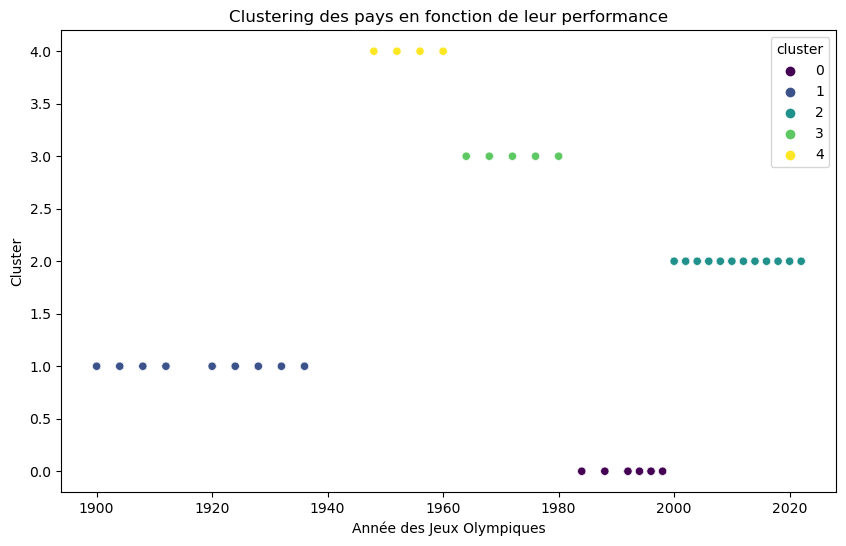

In [73]:
# Visualisation des clusters 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustering_data, x='game_year', y='cluster', hue='cluster', palette='viridis')
plt.title('Clustering des pays en fonction de leur performance')
plt.xlabel('Année des Jeux Olympiques')
plt.ylabel('Cluster')
plt.show()

In [74]:
# Visualisation avec PCA pour réduire la dimensionnalité
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
clustering_data_pca = pca.fit_transform(clustering_data.drop('cluster', axis=1))

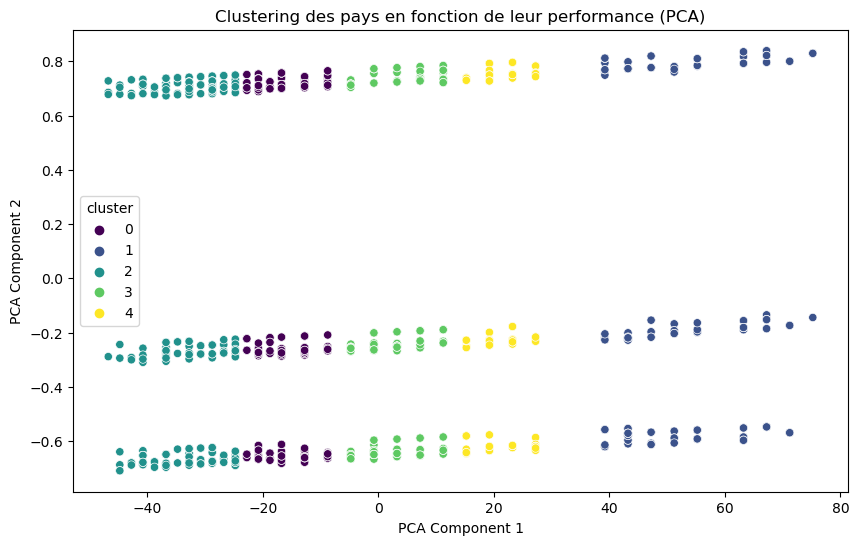

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clustering_data_pca[:, 0], y=clustering_data_pca[:, 1], hue=clustering_data['cluster'], palette='viridis')
plt.title('Clustering des pays en fonction de leur performance (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

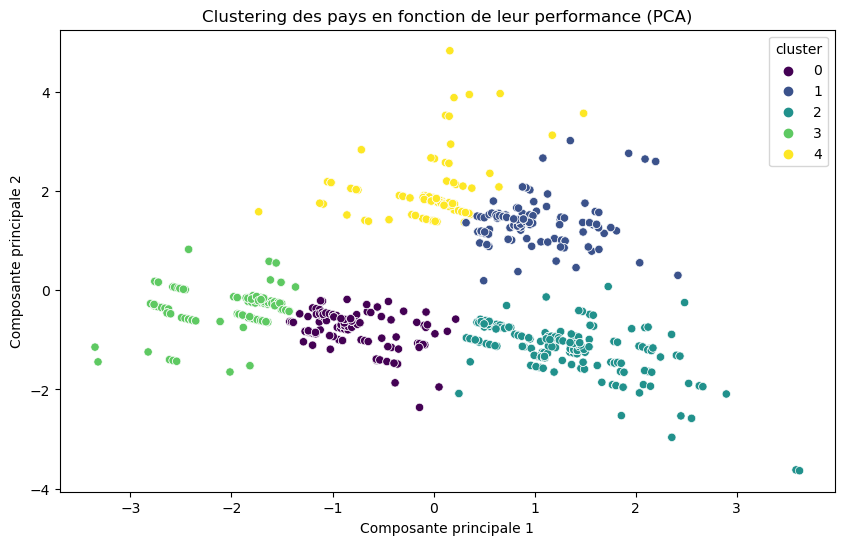

In [83]:
clustering_data_pca_df = pd.DataFrame(data=clustering_data_pca, columns=['PCA1', 'PCA2'])
clustering_data_pca_df['cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=clustering_data_pca_df, palette='viridis')
plt.title('Clustering des pays en fonction de leur performance (PCA)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

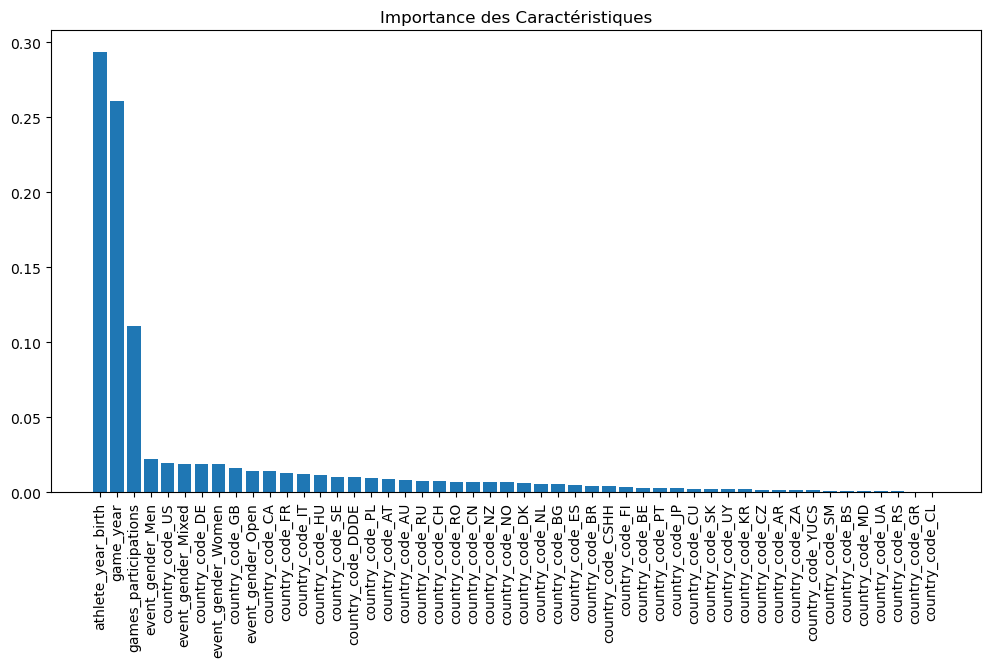

In [84]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Afficher les importances des caractéristiques
plt.figure(figsize=(12, 6))
plt.title("Importance des Caractéristiques")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.show()


In [93]:
# Assurez-vous que X_test contient les colonnes 'game_year' et 'country_code'
X_test_with_year_country = X_test.copy()
X_test_with_year_country['game_year'] = merged_data_partial.loc[X_test.index, 'game_year']
X_test_with_year_country['country_code'] = merged_data_partial.loc[X_test.index, 'country_code']


In [94]:
# Créer un DataFrame pour les prédictions
predictions_df = pd.DataFrame({
    'game_year': X_test_with_year_country['game_year'],
    'country_code': X_test_with_year_country['country_code'],
    'predicted_medal': y_pred
})

In [95]:
# Mapper les prédictions sur les types de médailles
predictions_df['predicted_medal'] = predictions_df['predicted_medal'].map({1: 'Bronze', 2: 'Silver', 3: 'Gold'})

In [97]:
# Grouper les données par année et par pays pour compter les médailles
medal_counts = predictions_df.groupby(['game_year', 'country_code', 'predicted_medal']).size().unstack(fill_value=0)

# Afficher le DataFrame des comptes de médailles
print(medal_counts)

predicted_medal         Bronze  Gold  Silver
game_year country_code                      
1904      US                 1     1       0
1908      DE                 0     2       0
          FR                 0     1       0
          GB                 0     0       1
          SE                 0     0       1
...                        ...   ...     ...
2016      RS                 0     0       1
          US                 0     2       0
2018      US                 0     0       1
2020      CZ                 0     1       0
          DE                 1     0       0

[154 rows x 3 columns]


In [98]:
# Visualiser le classement par année et par pays
medal_counts.reset_index(inplace=True)
medal_counts_melted = medal_counts.melt(id_vars=['game_year', 'country_code'], value_vars=['Bronze', 'Silver', 'Gold'],
                                        var_name='Medal_Type', value_name='Count')

Text(0.5, 1.05, 'Classement des Médailles par Année et par Pays')

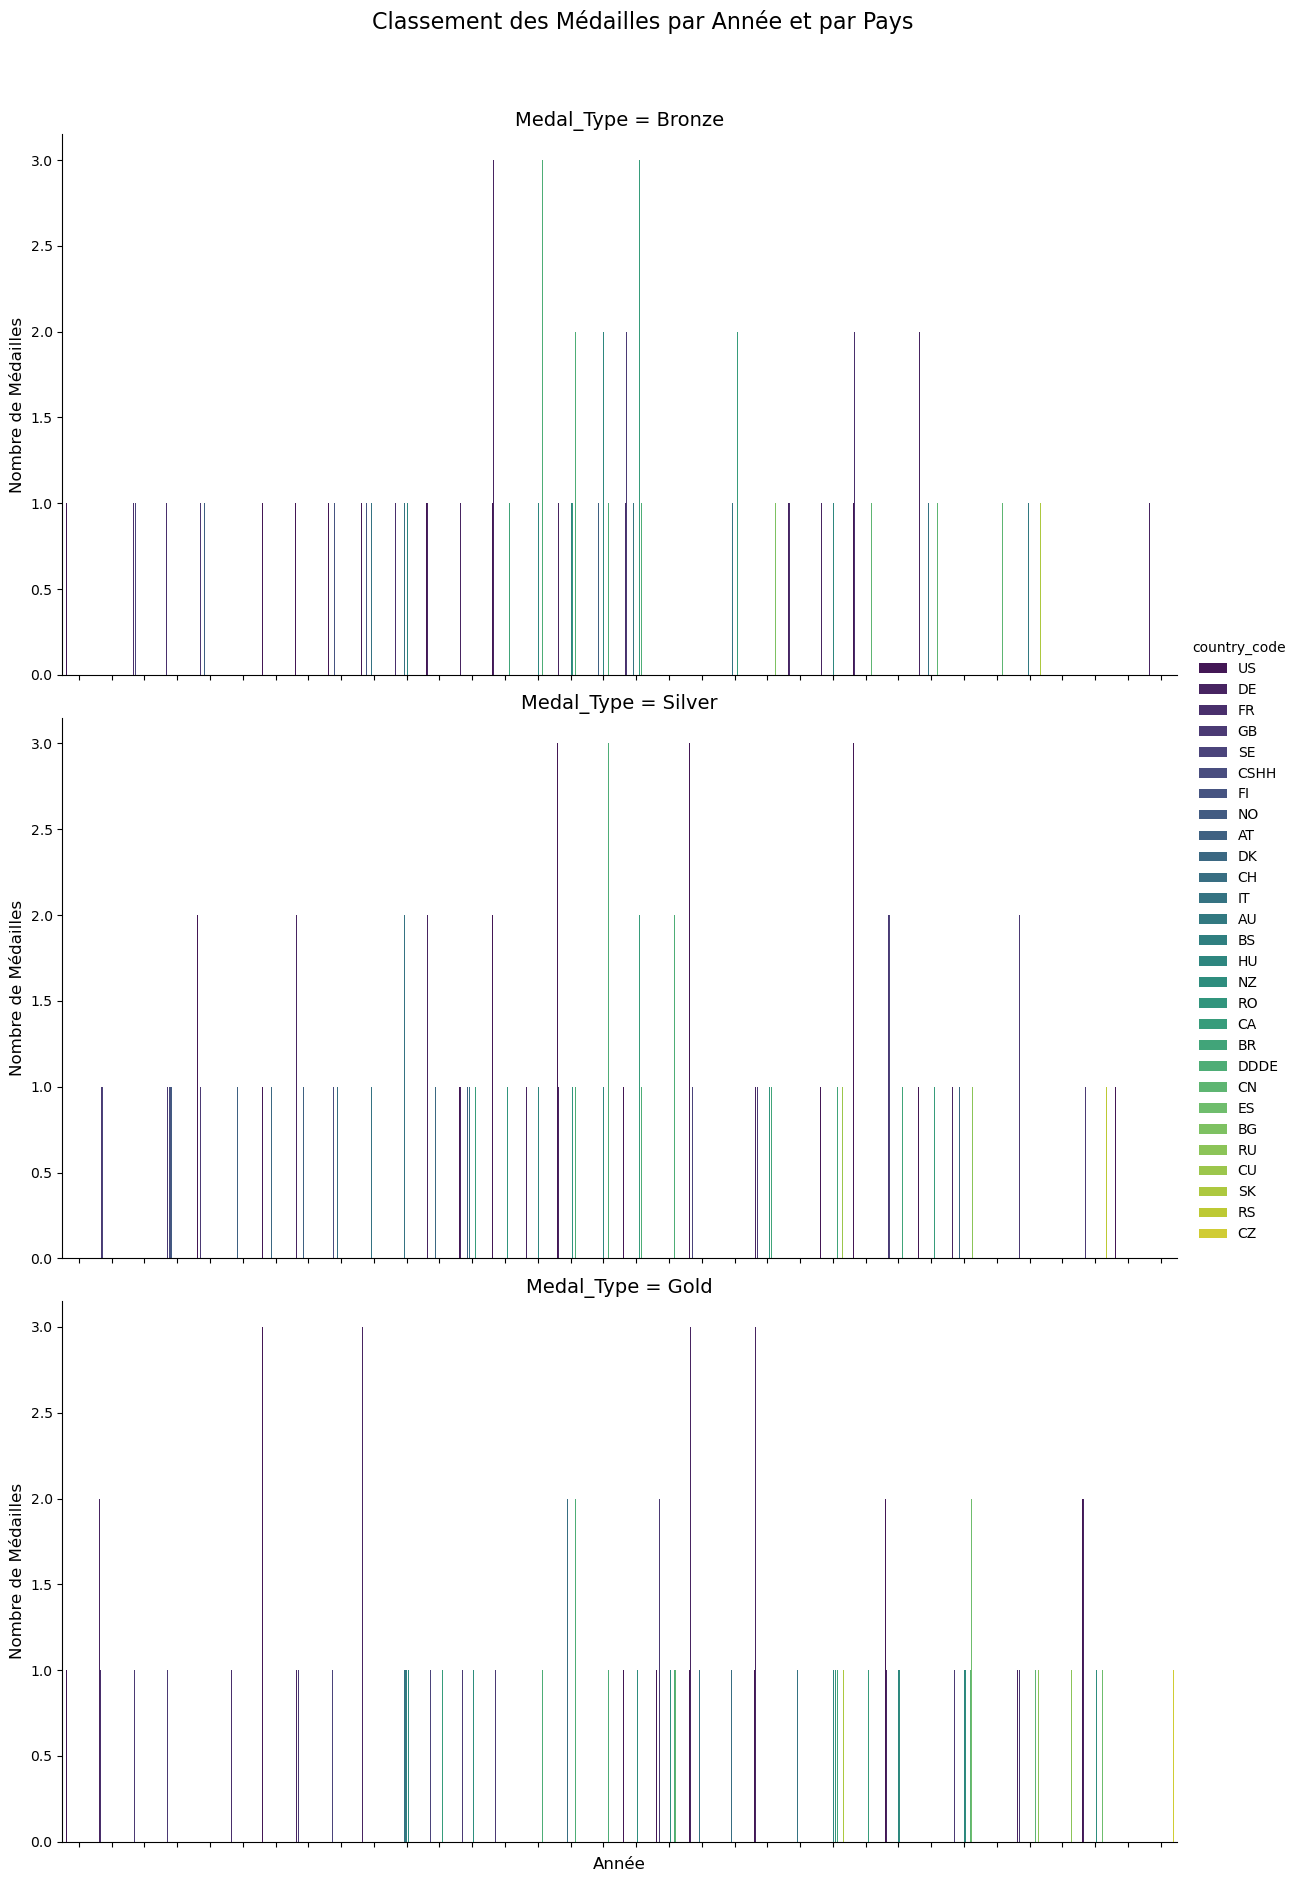

In [103]:
# Amélioration de la visualisation
g = sns.catplot(
    data=medal_counts_melted, 
    x='game_year', 
    y='Count', 
    hue='country_code', 
    col='Medal_Type', 
    kind='bar', 
    height=6, 
    aspect=2,
    col_wrap=1,
    palette='viridis'
)

# Ajuster les étiquettes de l'axe des x pour qu'elles soient inclinées
g.set_xticklabels(rotation=45, ha='right')

# Ajuster la taille des titres
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=14)
    ax.set_xlabel('Année', fontsize=12)
    ax.set_ylabel('Nombre de Médailles', fontsize=12)

# Ajouter un titre global
g.fig.suptitle('Classement des Médailles par Année et par Pays', fontsize=16, y=1.05)

plt.show()